<a href="https://colab.research.google.com/github/pvpogorelova/metrics_25_26/blob/main/sem_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Семинар 8.
# Сезонные дамми-переменные.

import pandas as pd # работа с таблицами
import numpy as np # математические функции и матрицы
import matplotlib.pyplot as plt # графики
import seaborn as sns # еще более классные графики
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка
import math

In [ ]:
# При желании можем настроить графики по своему вкусу, изменив стиль и другие параметры шрифтов и графиков
# (https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

plt.rc('font', size=14)
plt.rc('figure', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)

In [ ]:
# Импортируем данные об экономике Баккардии

data = pd.read_excel('Chow_2.xls')
data

,Year,Quarter,C,Y,D1,D2,D3,D4
0,2015,1,76.11,92.12,1,0,0,0
1,2015,2,75.80,95.01,0,1,0,0
2,2015,3,79.54,95.27,0,0,1,0
3,2015,4,80.07,97.05,0,0,0,1
4,2016,1,81.86,97.06,1,0,0,0
5,2016,2,82.57,98.99,0,1,0,0
6,2016,3,84.00,99.02,0,0,1,0
7,2016,4,81.33,94.34,0,0,0,1
8,2017,1,78.64,95.50,1,0,0,0
9,2017,2,79.08,98.25,0,1,0,0


In [ ]:
# Создадим дамми переменные для факторной переменной Quarter (номер квартала)

pd.get_dummies(data, columns = ["Quarter"],drop_first = True)

,Year,C,Y,D1,D2,D3,D4,Quarter_2,Quarter_3,Quarter_4
0,2015,76.11,92.12,1,0,0,0,False,False,False
1,2015,75.80,95.01,0,1,0,0,True,False,False
2,2015,79.54,95.27,0,0,1,0,False,True,False
3,2015,80.07,97.05,0,0,0,1,False,False,True
4,2016,81.86,97.06,1,0,0,0,False,False,False
5,2016,82.57,98.99,0,1,0,0,True,False,False
6,2016,84.00,99.02,0,0,1,0,False,True,False
7,2016,81.33,94.34,0,0,0,1,False,False,True
8,2017,78.64,95.50,1,0,0,0,False,False,False
9,2017,79.08,98.25,0,1,0,0,True,False,False


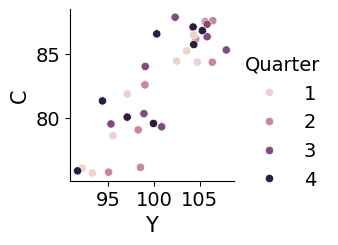

In [ ]:
# Построим диаграмму рассеяния потребления от дохода, учитывая номер квартала, к которому относится наблюдение

sns.pairplot(data,x_vars = ['Y'],y_vars=['C'],hue = 'Quarter')

In [ ]:
# Оценим модель регрессии для потребления, используя в качестве объясняющих переменных доход и квартал (сезонность)

model_1 = smf.ols('C ~ Y + D2 + D3 + D4', data = data).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           2.53e-08
Time:                        12:23:57   Log-Likelihood:                -66.356
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8255      8.275      0.583      0.5

In [ ]:
# Проверим гипотезу об отсутствии сезонности

hypotheses = '(D2 = D3 = D4 = 0)' # формулируем гипотезу H_0
print(model_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=1.2961278194597616, p=0.29595511594426166, df_denom=27, df_num=3>


In [ ]:
# Оценим эту же модель, но включим все дамми на сезонность, исключив константу

model_1_wc = smf.ols('C ~ 0 + Y + D1 + D2 + D3 + D4', data = data).fit()
print(model_1_wc.summary())# получили тот же самый результат, что и в модели model_1

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           2.53e-08
Time:                        12:24:20   Log-Likelihood:                -66.356
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.7745      0.083      9.315      0.0

In [ ]:
# Создадим переменные взаимодействия (перекрестные переменные), чтобы учесть возможную разную зависимость потребления
# от дохода в разные кварталы

data['yq2'] = data['Y']*data['D2']
data['yq3'] = data['Y']*data['D3']
data['yq4'] = data['Y']*data['D4']

data

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,yq4
0,2015,1,76.11,92.12,1,0,0,0,0.00,0.00,0.00
1,2015,2,75.80,95.01,0,1,0,0,95.01,0.00,0.00
2,2015,3,79.54,95.27,0,0,1,0,0.00,95.27,0.00
3,2015,4,80.07,97.05,0,0,0,1,0.00,0.00,97.05
4,2016,1,81.86,97.06,1,0,0,0,0.00,0.00,0.00
5,2016,2,82.57,98.99,0,1,0,0,98.99,0.00,0.00
6,2016,3,84.00,99.02,0,0,1,0,0.00,99.02,0.00
7,2016,4,81.33,94.34,0,0,0,1,0.00,0.00,94.34
8,2017,1,78.64,95.50,1,0,0,0,0.00,0.00,0.00
9,2017,2,79.08,98.25,0,1,0,0,98.25,0.00,0.00


In [ ]:
# Оценим модель, учитывающую переменные взаимодействия

model_2 = smf.ols('C ~ Y + D2 + D3 + D4 + yq2 + yq3 + yq4', data = data).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           8.19e-07
Time:                        12:24:53   Log-Likelihood:                -64.868
No. Observations:                  32   AIC:                             145.7
Df Residuals:                      24   BIC:                             157.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9411     15.264      0.258      0.7

# **Анализ влиятельных наблюдений и выбросов**

In [ ]:
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами

In [ ]:
# Выведем таблицу, содержащую различные показатели

influence = model_1.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())

   dfb_Intercept     dfb_Y    dfb_D2    dfb_D3    dfb_D4   cooks_d  \
0      -0.011159  0.010054  0.006841  0.006608  0.008630  0.000055   
1      -0.218412  0.219292 -0.246155 -0.048321 -0.008891  0.027097   
2       0.153718 -0.154338  0.031004  0.175586  0.006257  0.013557   
3      -0.044271  0.044450 -0.008929 -0.009794 -0.110091  0.005257   
4       0.115655 -0.083646 -0.233479 -0.230780 -0.251890  0.027605   

   standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0       -0.032931  0.202221        -0.016580      -0.032317 -0.016270  
1       -0.746409  0.195614        -0.368082      -0.740132 -0.364987  
2        0.527866  0.195667         0.260354       0.520692  0.256816  
3       -0.409472  0.135513        -0.162120      -0.403071 -0.159585  
4        0.953940  0.131699         0.371516       0.952293  0.370874  


In [ ]:
# Объединим исходные данные с таблицей показателей

results = pd.concat([data, inf_sum], axis = 1)
print(results)

    Year  Quarter      C       Y  D1  D2  D3  D4     yq2     yq3  ...  \
0   2015        1  76.11   92.12   1   0   0   0    0.00    0.00  ...   
1   2015        2  75.80   95.01   0   1   0   0   95.01    0.00  ...   
2   2015        3  79.54   95.27   0   0   1   0    0.00   95.27  ...   
3   2015        4  80.07   97.05   0   0   0   1    0.00    0.00  ...   
4   2016        1  81.86   97.06   1   0   0   0    0.00    0.00  ...   
5   2016        2  82.57   98.99   0   1   0   0   98.99    0.00  ...   
6   2016        3  84.00   99.02   0   0   1   0    0.00   99.02  ...   
7   2016        4  81.33   94.34   0   0   0   1    0.00    0.00  ...   
8   2017        1  78.64   95.50   1   0   0   0    0.00    0.00  ...   
9   2017        2  79.08   98.25   0   1   0   0   98.25    0.00  ...   
10  2017        3  80.34   98.88   0   0   1   0    0.00   98.88  ...   
11  2017        4  75.90   91.62   0   0   0   1    0.00    0.00  ...   
12  2018        1  75.74   93.24   1   0   0   0   

In [ ]:
# 1. Показатель воздействия наблюдения или «разбалансировки»: точки левериджа (p_ii - показатель влияния, рычаг)

leverage = influence.hat_matrix_diag
leverage

array([0.20222109, 0.19561436, 0.19566709, 0.1355131 , 0.13169912,
       0.13661901, 0.13869322, 0.1691323 , 0.14566553, 0.14381222,
       0.14002433, 0.22613495, 0.17949461, 0.14118917, 0.12707817,
       0.12512904, 0.14254172, 0.13764599, 0.12516252, 0.1256577 ,
       0.15587072, 0.14875375, 0.14799538, 0.1587045 , 0.16754208,
       0.15984321, 0.14799538, 0.15973218, 0.17451859, 0.15910639,
       0.18021492, 0.17502766])

In [ ]:
# Определим пороговое значение для точек левериджа
cutoff_leverage = (2*5)/32
cutoff_leverage

0.3125

In [ ]:
# Выведем номера всех точек левериджа
high_leverage = pd.DataFrame((results[abs(leverage) > cutoff_leverage]))
high_leverage

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


In [ ]:
# 2. Анализ влиятельности наблюдения: DFFITS

dffits = influence.dffits
print(dffits)

In [ ]:
# пороговое значение для DFFITS: cutoff = 2*sqrt(k/n)

cutoff_dffits = 2*math.sqrt(5/32)
print(cutoff_dffits)

0.7905694150420949


In [ ]:
# Выведем наблюдения, являющиеся влиятельными согласно DFFITS

dffits_high = pd.DataFrame((results[abs(inf_sum.dffits) > cutoff_dffits]))
dffits_high

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13,2018,2,76.17,98.5,0,1,0,0,98.5,0.0,...,0.279047,-0.593162,-0.061488,-0.011314,0.121707,-1.923935,0.141189,-0.780086,-2.032419,-0.824072


In [ ]:
# 3. Анализ влиятельности наблюдения: DFBETAS

cut_off = 2 / math.sqrt(32)
print(cut_off)

0.35355339059327373


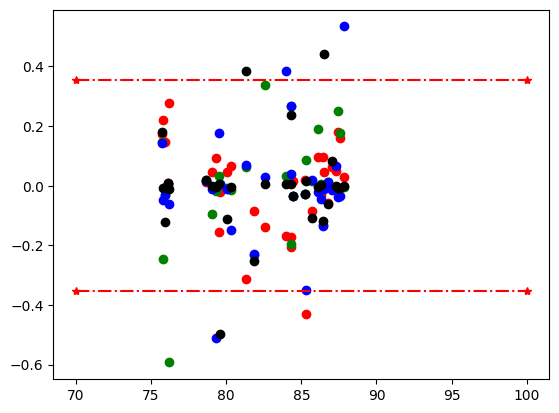

In [ ]:
plt.scatter(results.C, results.dfb_Y, color = "red", marker = "o")
plt.scatter(results.C, results.dfb_D2, color = "green", marker = "o")
plt.scatter(results.C, results.dfb_D3, color = "blue", marker = "o")
plt.scatter(results.C, results.dfb_D4, color = "black", marker = "o")
plt.plot((70,100),(0.354, 0.354), '-.r*')
plt.plot((70,100),(-0.354, -0.354), '-.r*')

In [ ]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной Y

high_dfby = pd.DataFrame((results[abs(results.dfb_Y) > cut_off]))
high_dfby

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
30,2022,3,85.28,107.89,0,0,1,0,0.0,107.89,...,-0.429382,0.086257,-0.350989,0.017409,0.113076,-1.603705,0.180215,-0.751917,-1.654497,-0.775732


In [ ]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной D2

high_dfbd2 = pd.DataFrame((results[abs(results.dfb_D2) > cut_off]))
high_dfbd2

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13,2018,2,76.17,98.5,0,1,0,0,98.5,0.0,...,0.279047,-0.593162,-0.061488,-0.011314,0.121707,-1.923935,0.141189,-0.780086,-2.032419,-0.824072


In [ ]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной D3

high_dfbd3 = pd.DataFrame((results[abs(results.dfb_D3) > cut_off]))
high_dfbd3

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
6,2016,3,84.00,99.02,0,0,1,0,0.0,99.02,...,-0.167521,0.033653,0.386012,0.006792,0.055282,1.310166,0.138693,0.525745,1.328602,0.533143
14,2018,3,79.32,100.82,0,0,1,0,0.0,100.82,...,0.091964,-0.018474,-0.512200,-0.003729,0.094498,-1.801560,0.127078,-0.687380,-1.884793,-0.719137
18,2019,3,87.82,102.29,0,0,1,0,0.0,102.29,...,0.028255,-0.005676,0.534243,-0.001146,0.109582,1.956958,0.125163,0.740210,2.073013,0.784107


In [ ]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной D4

high_dfbd4 = pd.DataFrame((results[abs(results.dfb_D4) > cut_off]))
high_dfbd4

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
7,2016,4,81.33,94.34,0,0,0,1,0.0,0.0,...,-0.313944,0.063067,0.069177,0.386027,0.073224,1.341114,0.169132,0.605080,1.362197,0.614592
15,2018,4,79.58,99.92,0,0,0,1,0.0,0.0,...,-0.022743,0.004569,0.005011,-0.499189,0.091790,-1.791334,0.125129,-0.677460,-1.872646,-0.708211
19,2019,4,86.53,100.28,0,0,0,1,0.0,0.0,...,0.045680,-0.009176,-0.010066,0.443080,0.074818,1.613368,0.125658,0.611628,1.665526,0.631401


In [ ]:
# 4. Анализ выбросов: стьюдентизированные остатки

student_resid = influence.resid_studentized_external
print(student_resid)

[-0.03231652 -0.74013159  0.52069227 -0.40307082  0.95229311  1.18233486
  1.32860183  1.36219667 -0.07571695 -0.32049503 -0.5096329  -0.40709052
 -0.67760929 -2.03241942 -1.88479273 -1.87264628  0.12149683  0.79454158
  2.07301337  1.66552602  0.09480606  1.07568366 -0.19589484  0.31118131
  0.42216853  0.78493945  0.29695178 -0.41315495 -0.83472876 -0.86145684
 -1.65449729 -0.23434812]


In [ ]:
# определим критическое значение для стьюдентизированных остатков

from scipy import stats
crit = stats.t(df=26).ppf((0.95))
print(crit)

1.7056179197592727


In [ ]:
# Выведем номера всех возможных выбросов согласно стьюдентизированным остаткам

high_stud_res = pd.DataFrame((results[abs(student_resid) > crit]))
high_stud_res

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13,2018,2,76.17,98.50,0,1,0,0,98.5,0.00,...,0.279047,-0.593162,-0.061488,-0.011314,0.121707,-1.923935,0.141189,-0.780086,-2.032419,-0.824072
14,2018,3,79.32,100.82,0,0,1,0,0.0,100.82,...,0.091964,-0.018474,-0.512200,-0.003729,0.094498,-1.801560,0.127078,-0.687380,-1.884793,-0.719137
15,2018,4,79.58,99.92,0,0,0,1,0.0,0.00,...,-0.022743,0.004569,0.005011,-0.499189,0.091790,-1.791334,0.125129,-0.677460,-1.872646,-0.708211
18,2019,3,87.82,102.29,0,0,1,0,0.0,102.29,...,0.028255,-0.005676,0.534243,-0.001146,0.109582,1.956958,0.125163,0.740210,2.073013,0.784107


In [ ]:
# Удалим влиятельные наблюдения и выбросы и переоценим регерссию заново

data_new = data.drop([13,14,15,18])
data_new

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,yq4
0,2015,1,76.11,92.12,1,0,0,0,0.00,0.00,0.00
1,2015,2,75.80,95.01,0,1,0,0,95.01,0.00,0.00
2,2015,3,79.54,95.27,0,0,1,0,0.00,95.27,0.00
3,2015,4,80.07,97.05,0,0,0,1,0.00,0.00,97.05
4,2016,1,81.86,97.06,1,0,0,0,0.00,0.00,0.00
5,2016,2,82.57,98.99,0,1,0,0,98.99,0.00,0.00
6,2016,3,84.00,99.02,0,0,1,0,0.00,99.02,0.00
7,2016,4,81.33,94.34,0,0,0,1,0.00,0.00,94.34
8,2017,1,78.64,95.50,1,0,0,0,0.00,0.00,0.00
9,2017,2,79.08,98.25,0,1,0,0,98.25,0.00,0.00


In [ ]:
# Оценим модель на новой выборке и сравним результаты оценивания с предыдущими, полученными по полной выборке
reg_new = smf.ols('C ~ Y + D2 + D3 + D4', data = data_new).fit()
print(reg_new.summary())
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     34.65
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           1.99e-09
Time:                        12:56:41   Log-Likelihood:                -50.590
No. Observations:                  28   AIC:                             111.2
Df Residuals:                      23   BIC:                             117.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6607      6.491      1.180      0.2

Не спешите удалять нетипичные наблюдения! Возможно, стоит их замоделировать путём введения dummy-переменной.

In [ ]:
data['outlier'] = 0
data.loc[[13, 14, 15, 18], 'outlier'] = 1 # дамми-переменная на outliers

In [ ]:
# Оценим модель на новой выборке и сравним результаты оценивания с предыдущими, полученными по полной выборке
reg_do = smf.ols('C ~ Y + D2 + D3 + D4 + outlier', data = data).fit()
print(reg_do.summary())
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     20.83
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           2.40e-08
Time:                        12:59:38   Log-Likelihood:                -64.204
No. Observations:                  32   AIC:                             140.4
Df Residuals:                      26   BIC:                             149.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.0828      7.911      0.769   

Если вы хотите сравнить переменные по силе поздействия на зависимую переменную, помните, что необходимо перейти к стандартизированным показателям. В этом случае интерпретация оценки коэффициента $\beta_j$ перед переменной $X_j$ будет следующей: при увеличении $X_j$ на 1 стандартное отклонение зависимая переменная $y$ при прочих равных в среднем изменится на $\hat{\beta}_j$ стандартных отклонений.

In [ ]:
# Стандартизируем переменные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scale=data.copy()
data_scale=pd.DataFrame(scaler.fit_transform(data_scale), columns=data_scale.columns)
data_scale

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,yq4,new_variable
0,-1.527525,-1.341641,-1.623730,-1.834929,1.732051,-0.577350,-0.577350,-0.577350,-0.576694,-0.576755,-0.576506,-0.377964
1,-1.527525,-0.447214,-1.700729,-1.210157,-0.577350,1.732051,-0.577350,-0.577350,1.578206,-0.576755,-0.576506,-0.377964
2,-1.527525,0.447214,-0.771774,-1.153949,-0.577350,-0.577350,1.732051,-0.577350,-0.576694,1.578708,-0.576506,-0.377964
3,-1.527525,1.341641,-0.640131,-0.769142,-0.577350,-0.577350,-0.577350,1.732051,-0.576694,-0.576755,1.669716,-0.377964
4,-1.091089,-1.341641,-0.195524,-0.766980,1.732051,-0.577350,-0.577350,-0.577350,-0.576694,-0.576755,-0.576506,-0.377964
5,-1.091089,-0.447214,-0.019172,-0.349745,-0.577350,1.732051,-0.577350,-0.577350,1.668475,-0.576755,-0.576506,-0.377964
6,-1.091089,0.447214,0.336016,-0.343260,-0.577350,-0.577350,1.732051,-0.577350,-0.576694,1.663551,-0.576506,-0.377964
7,-1.091089,1.341641,-0.327168,-1.355000,-0.577350,-0.577350,-0.577350,1.732051,-0.576694,-0.576755,1.606993,-0.377964
8,-0.654654,-1.341641,-0.995320,-1.104227,1.732051,-0.577350,-0.577350,-0.577350,-0.576694,-0.576755,-0.576506,-0.377964
9,-0.654654,-0.447214,-0.886031,-0.509721,-0.577350,1.732051,-0.577350,-0.577350,1.651692,-0.576755,-0.576506,-0.377964


In [ ]:
# Оценим модель регрессии model_1 для шкалированных показателей
model_1_scale = smf.ols('C ~ Y + D2 + D3 + D4', data=data_scale).fit()
print(model_1_scale.summary())


                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           2.53e-08
Time:                        13:07:26   Log-Likelihood:                -21.787
No. Observations:                  32   AIC:                             53.57
Df Residuals:                      27   BIC:                             60.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.441e-16      0.092  -4.83e-15      1.0